# FOI requests data analysis

As of January 31, 2022, PST

In this notebook, we use the CSV file generated by the auto-scraper to make our analysis of FOI requests.

Remember that the **foi-ph-scraper** ideally scrapes new information from the website every Sunday of the week. The file generated is in a separate repository, which I will just read in here.

In [1]:
import pandas as pd
import re
import requests
from plotnine import *

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read df and clean it

Read through the CSV, remove unnecessary columns, look for NaN values and duplicates, convert to datetime before you go through the data.

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.read_csv('foi_final.csv')
df.tail(15)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


,Unnamed: 0,agency,date,title,status,purpose,period_covered,link,reason_denial
96145,94000,SEC,2022-01-31,Number of registered and/or active NGOs involv...,SUCCESSFUL,Research Development for the Commission on Hum...,01/01/2021 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96146,94001,DOH,2022-01-31,Research data and statistics - BIS,PENDING,Research purpose,01/01/2019 - 01/29/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96147,94002,PNP,2022-01-31,Stop making Group Chat,PENDING,Stop Online Lending Apps harrasing and making ...,01/29/2022 - 01/29/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96148,94003,DILG,2022-01-31,Number of Operational Peace and Order Councils...,PENDING,Research,01/31/2022 - 01/31/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96149,94004,PCSO,2022-01-31,Revised Implementing Guidelines of the Medical...,ACCEPTED,Provide basis for implementation of hospital r...,01/31/2021 - 01/31/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96150,94005,OVP,2022-01-31,VP Leni's SALN and accomplishments including f...,PENDING,Personal Research for 2022 Presidential Election,06/30/2016 - 01/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96151,94006,ECC,2022-01-31,ECC cash assistance,PENDING,ECC cash assistance - follow up,10/20/2021 - 01/31/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96152,94007,DepEd,2022-01-31,Implementing Rules and Regulations (IRR) of RA...,SUCCESSFUL,Research and development,01/01/2022 - 01/31/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96153,94008,DENR,2022-01-31,[NWRB Concern] Pasay City Water Quality Data,PENDING,Feasibility Study,01/01/2010 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96154,94009,AFP,2022-01-31,Discharge order,PENDING,Employment,08/10/2007 - 03/01/2013,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Convert to datetime

In [3]:
df.dtypes

Unnamed: 0         int64
agency            object
date              object
title             object
status            object
purpose           object
period_covered    object
link              object
reason_denial     object
dtype: object

In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
df.dtypes

Unnamed: 0                 int64
agency                    object
date              datetime64[ns]
title                     object
status                    object
purpose                   object
period_covered            object
link                      object
reason_denial             object
dtype: object

## Remove 'Unnamed: 0' column

In [6]:
df = df.drop(["Unnamed: 0"], axis=1)
df

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DOTr,2016-11-25,clark green city update,CLOSED,for update,11/25/2016 - 11/25/2016,NaN,—
1,DOH,2016-11-25,HIV stats in the Philippines,CLOSED,Personal research,11/25/2015 - 11/25/2016,NaN,—
2,DOTr,2016-11-25,List of Public Utility Bus companies and numbe...,SUCCESSFUL,Research for alternative solution in EDSA Traf...,01/01/2010 - 11/24/2016,NaN,—
3,PCOO,2016-11-25,Printed FOI manual for PCOO,CLOSED,Research,11/24/2016 - 11/24/2016,NaN,—
4,DOH,2016-11-25,"Incidence of diarrhea, constipation, and respi...",PARTIALLY SUCCESSFUL,Research,11/25/2010 - 11/25/2016,NaN,—
...,...,...,...,...,...,...,...,...
96155,MWSS,2022-01-31,Pasay City Water Quality Data,ACCEPTED,Feasibility Study,01/01/2010 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96156,BIR,2022-01-31,BIR FORM,DENIED,For employment,12/01/2021 - 01/31/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96157,BCWD,2022-01-31,Updated Comprehensive Land Use Plan of Bacolod...,PENDING,Requirement Paper for my Masters,01/31/2022 - 01/31/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
96158,DTI,2022-01-31,Demand and supply of private cars in Calamba C...,REFERRED,Research,01/01/2017 - 01/26/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Looking into the NaNs

We look for null values and whether they account for significant number of the data.

In [7]:
df.isna().sum()

agency                0
date                  0
title                 2
status                0
purpose               1
period_covered        0
link              91580
reason_denial      4580
dtype: int64

Interpretation: The **link** column have over 91,000 null values. This is because a large part of the data in our df came from an existing CSV maintained by the government. The same goes for **reason_denial.**

You can find the CSV here: https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR332h3xXbevTcnDiKQwKWldsod3kPP3J0T9_5NSXALgFI7XZPyIxMuqXg0#gid=875187444

The data is updated quarterly. We merged this data early on with the scraped data from the website.

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [8]:
df.status.value_counts(normalize=True) * 100

SUCCESSFUL                42.370008
DENIED                    26.870840
PENDING                   10.210067
PARTIALLY SUCCESSFUL       7.622712
ACCEPTED                   4.321963
CLOSED                     3.635607
AWAITING CLARIFICATION     2.495840
REFERRED                   1.464226
PROCESSING                 1.004576
EXTENDED                   0.004160
Name: status, dtype: float64

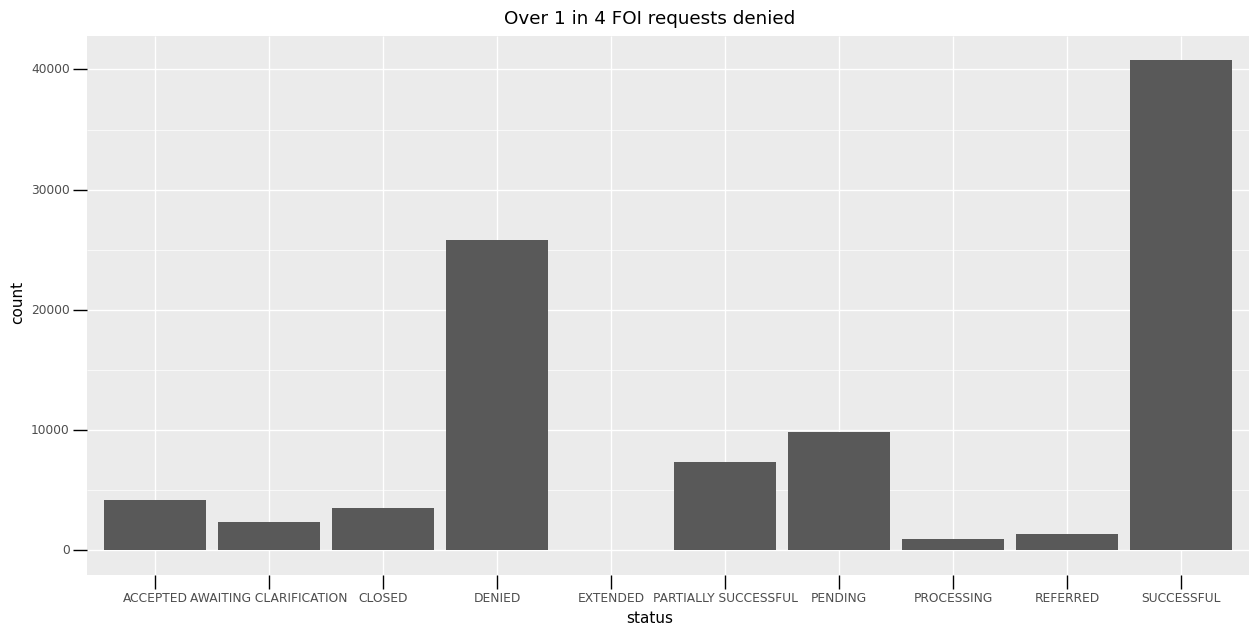

<ggplot: (302515792)>

In [9]:
(
    ggplot(df) + 
    geom_bar(aes(x="status")) + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Over 1 in 4 FOI requests denied")
)

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [10]:
df.agency.value_counts().head(10)

DOH      6717
PSA      5760
DOLE     5254
SSS      4247
OWWA     4019
DepEd    3859
BIR      3844
DSWD     3635
NTC      2904
DPWH     2520
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [11]:
df[df.status=="DENIED"].agency.value_counts().head(10)

BIR     2451
DSWD    2278
DENR    1287
DOH     1071
DTI     1060
DOLE     828
DOTr     783
HDMF     665
DILG     599
SSS      515
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [12]:
df[df.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate                                                                         170
Vaxcert                                                                                          65
VaxCert                                                                                          47
Vaccine Certificate                                                                              45
Vaccination certificate                                                                          43
Vax Cert                                                                                         33
Vax Certificate                                                                                  27
VACCINATION CERTIFICATE                                                                          24
VAXCERT                                                                                          23
Swab test result                                                                                 22


In [13]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df[df['title'].isin(vax)]
df_vax.head(10)

,agency,date,title,status,purpose,period_covered,link,reason_denial
84695,DOH,2021-11-15,Vaccination Certificate,SUCCESSFUL,Travel purpose,11/15/2021 - 11/15/2021,NaN,—
84753,DOH,2021-11-15,Vax Cert,SUCCESSFUL,Travel,11/23/0201 - 11/26/0201,NaN,—
84943,DOH,2021-11-16,VaxCert,SUCCESSFUL,for travel purpose,11/16/2021 - 11/16/2021,NaN,—
85012,DOH,2021-11-16,VaxCertPH,SUCCESSFUL,Follow-Up on VaxCertPH,11/01/2021 - 11/16/2021,NaN,—
85071,DOH,2021-11-16,VAX CERT,SUCCESSFUL,Requirement for work and travel,11/16/2021 - 11/16/2021,NaN,—
85092,DOH,2021-11-16,VaxCert,SUCCESSFUL,Travel,11/03/2021 - 11/16/2021,NaN,—
85201,DOH,2021-11-17,Vaccination Certificate,SUCCESSFUL,Need of Vax cert for travel,05/31/2021 - 11/17/2021,NaN,—
85248,DOH,2021-11-17,VAXCERT,SUCCESSFUL,FOLLOW UP VAXCERT.,11/01/2021 - 11/17/2021,NaN,—
85437,DOH,2021-11-18,Vaccination Certificate,SUCCESSFUL,Travel Purposes,03/08/2021 - 04/08/2021,NaN,—
85442,DOH,2021-11-18,Vaxcert,SUCCESSFUL,To print my vaxcert for my travel purposes,07/19/2021 - 10/27/2021,NaN,—


Interpretation: Nearly 30% of DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [14]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df[df['title'].isin(sap)]
df_sap[df_sap.status=="DENIED"].head(10)

,agency,date,title,status,purpose,period_covered,link,reason_denial
28407,DSWD,2020-04-09,Social amelioration program,DENIED,Personal information only,04/09/2020 - 04/09/2020,NaN,—
28969,DSWD,2020-04-21,Social Amelioration Program,DENIED,Transparency purposes to my kabarangay,04/01/2020 - 04/21/2020,NaN,—
28982,DSWD,2020-04-21,Sap,DENIED,Solo parent,04/08/2020 - 04/21/2020,NaN,—
29151,DSWD,2020-04-23,Social Amelioration Program,DENIED,Validation and Confirmation,04/23/2020 - 04/23/2020,NaN,—
29345,DSWD,2020-04-25,Social Amelioration Program,DENIED,To known the list of beneficiaries of Social A...,03/01/2020 - 04/25/2020,NaN,—
29392,DSWD,2020-04-27,Social Amelioration Program,DENIED,Transparency,04/19/2020 - 04/27/2020,NaN,—
29401,DSWD,2020-04-27,DSWD SAP,DENIED,To know the status of DSWD SAP in our Barangay.,04/27/2020 - 04/27/2020,NaN,—
29729,DSWD,2020-05-01,SAP,DENIED,SAP APPLICATION,05/01/2020 - 05/01/2020,NaN,—
29731,DSWD,2020-05-01,Social Amelioration Program,DENIED,Social Amelioration Program,03/16/2020 - 04/30/2020,NaN,incomplete-request
29818,DSWD,2020-05-03,Sap,DENIED,Applying for special amelioration program,03/21/2020 - 04/21/2020,NaN,—


Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

## OVP: Any type of "assistance"

The office is known for its **Angat Buhay** program that helps the poor.

In [15]:
df[df.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    398
True     268
Name: title, dtype: int64

Interpretation: Nearly three in four OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [16]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification']
df_tax = df[df['title'].isin(tax)]
df_tax.head(7)

,agency,date,title,status,purpose,period_covered,link,reason_denial
10978,BIR,2019-03-03,tin number,SUCCESSFUL,employment,03/03/2007 - 03/03/2010,NaN,—
11177,BIR,2019-03-07,TIN,SUCCESSFUL,Lot sale,01/01/2005 - 03/07/2019,NaN,—
13637,BIR,2019-06-12,TIN,SUCCESSFUL,Opening of Bank account,06/12/2019 - 06/12/2019,NaN,—
17958,BIR,2019-09-26,TIN,SUCCESSFUL,For issuance of tin ID,03/29/2019 - 06/22/2019,NaN,—
19040,BIR,2019-10-11,tin number,DENIED,employment,09/05/2019 - 10/10/2019,NaN,incomplete-request
21943,BIR,2019-11-29,BIR 2316,PARTIALLY SUCCESSFUL,BANK LOAN,01/01/2018 - 12/31/2018,NaN,—
22770,BIR,2019-12-26,TIN,DENIED,For verification,07/26/2019 - 12/26/2019,NaN,—


In [17]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    51.334702
AWAITING CLARIFICATION    36.139630
SUCCESSFUL                 6.057495
ACCEPTED                   2.156057
PARTIALLY SUCCESSFUL       1.642710
PENDING                    1.026694
CLOSED                     0.821355
REFERRED                   0.513347
PROCESSING                 0.308008
Name: status, dtype: float64

# By topic

## Duterte's drug war

# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [18]:
df[df.agency=="OP"].groupby('status').title.count()
#There were a lot of requests for TIN or tax identification number.

status
PENDING    19
Name: title, dtype: int64

## Top reasons for denial

Applicable only to data as of December 2021.

In [19]:
df.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               77998
wrong-agency                     7043
NaN                              4580
incomplete-request               2789
invalid-request                  2107
information-available-online     1640
exceptions                          2
privacy                             1
Name: reason_denial, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [20]:
df.title.str.contains("SALN", regex=False, case=False).value_counts()

False    95925
True       233
Name: title, dtype: int64

Over 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [21]:
df.title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).count()
#223 requests mentioning SALN.

0    238
dtype: int64

In [22]:
df[df.agency=="OVP"].title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).value_counts().sum()
#39 requests for the SALN of the Vice President.

52

## Track request numbers through time

### By month

In [23]:
month_query = df.resample('M', on='date').title.count().to_frame().reset_index()
month_query.head()

,date,title
0,2016-11-30,117
1,2016-12-31,220
2,2017-01-31,93
3,2017-02-28,127
4,2017-03-31,225


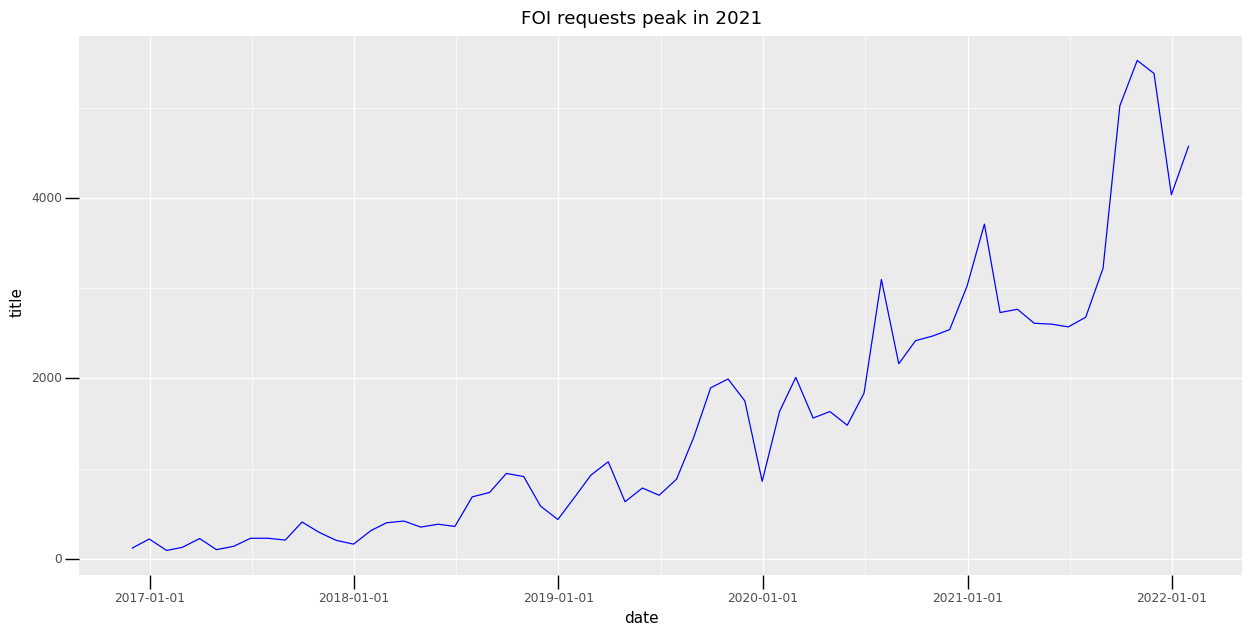

<ggplot: (301343714)>

In [24]:
(
    ggplot(month_query, aes(x="date", y="title")) + 
    geom_line(color="blue", stat="identity") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="FOI requests peak in 2021")
)

In [25]:
df.resample('M', on='date').title.count().sort_values(ascending=False).head(10)
#Largest number of FOI requests recorded in December 2021.

date
2021-10-31    5526
2021-11-30    5382
2021-09-30    5023
2022-01-31    4580
2021-12-31    4037
2021-01-31    3711
2021-08-31    3223
2020-07-31    3097
2020-12-31    3024
2021-03-31    2767
Name: title, dtype: int64

### By year

In [26]:
year_query = df.resample('A', on='date').title.count().to_frame().reset_index()
year_query

,date,title
0,2016-12-31,337
1,2017-12-31,2418
2,2018-12-31,6530
3,2019-12-31,13554
4,2020-12-31,25874
5,2021-12-31,42865
6,2022-12-31,4580


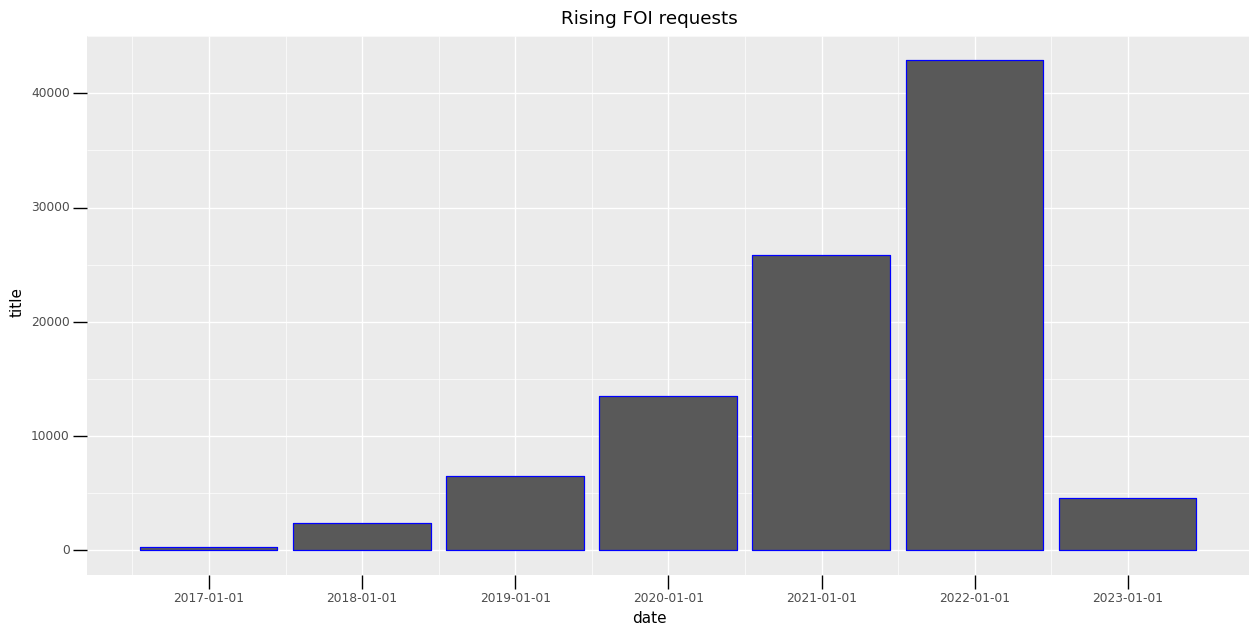

<ggplot: (302534173)>

In [27]:
(
    ggplot(year_query, aes(x="date", y="title")) + 
    geom_col(color="blue") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Rising FOI requests")
)

## Year-on-year change shows slowing down increase in FOI requests

In [28]:
df.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    617.507418
2018-12-31    170.057899
2019-12-31    107.565084
2020-12-31     90.895677
2021-12-31     65.668238
2022-12-31    -89.315292
Freq: A-DEC, Name: title, dtype: float64

# End.